In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/mcdonalds.csv")

# Exploring the data set and its variables.

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [6]:
data['VisitFrequency'] = data['VisitFrequency'].replace(to_replace='Every three months',value=4)
data['VisitFrequency'] = data['VisitFrequency'].replace(to_replace='Once a week',value=52)
data['VisitFrequency'] = data['VisitFrequency'].replace(to_replace='Once a month',value=12)
data['VisitFrequency'] = data['VisitFrequency'].replace(to_replace='Once a year',value=1)
data['VisitFrequency'] = data['VisitFrequency'].replace(to_replace='More than once a week',value=135)
data['VisitFrequency'] = data['VisitFrequency'].replace(to_replace='Never',value=0)

In [7]:
data['Like'] = data['Like'].replace(to_replace='I hate it!-5',value=-5)
data['Like'] = data['Like'].replace(to_replace='I love it!+5',value=+5)
data=data.replace(to_replace="Yes",value=1)
data=data.replace(to_replace="No",value=0)

In [8]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,4,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,4,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,4,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,52,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,12,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,52,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,12,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,4,Male


In [9]:
data['Like'].describe()

count     1453
unique      11
top         +3
freq       229
Name: Like, dtype: object

In [10]:
data_bool = data.drop("Like",axis=1)
data_bool = data_bool.drop("Gender",axis=1)
data_bool = data_bool.drop("Age",axis=1)
data_bool = data_bool.drop("VisitFrequency",axis=1)

In [11]:
for i in data_bool:
    print(data_bool[i].describe())
    print()

count    1453.000000
mean        0.552650
std         0.497391
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: yummy, dtype: float64

count    1453.000000
mean        0.907777
std         0.289440
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: convenient, dtype: float64

count    1453.000000
mean        0.093599
std         0.291371
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: spicy, dtype: float64

count    1453.000000
mean        0.867171
std         0.339506
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: fattening, dtype: float64

count    1453.000000
mean        0.526497
std         0.499469
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: greasy, dtype: float64

count

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(),annot=True,cmap='BuGn')

ValueError: could not convert string to float: 'Female'

# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pd.options.display.float_format = '{:.6f}'.format
pca = PCA(n_components=11)
pca.fit(data_bool)
pca_data = pca.transform(data_bool)
df = pd.DataFrame(pca_data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
std,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
min,-1.188421,-1.040274,-0.880813,-0.590621,-1.045938,-0.852491,-0.805946,-0.931620,-0.955761,-0.887197,-0.885144
25%,-0.547679,-0.356848,-0.450779,-0.281499,-0.243325,-0.192703,-0.134219,-0.171726,-0.118123,-0.146575,-0.105316
50%,-0.070746,-0.115163,0.026877,-0.116320,0.033488,-0.034602,-0.063662,-0.034756,0.038681,0.030206,-0.012014
75%,0.493301,0.391554,0.351594,0.270230,0.204829,0.174745,0.023184,0.129597,0.079878,0.070014,0.085541
max,1.705573,1.279130,1.326976,1.355278,1.053327,1.323793,1.350886,1.121388,1.086693,1.181524,0.925583


In [16]:
loadings = pd.DataFrame(pca.components_.T, columns=df.columns, index=data_bool.columns)
loadings

,0,1,2,3,4,5,6,7,8,9,10
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


Text(0, 0.5, 'PC2')

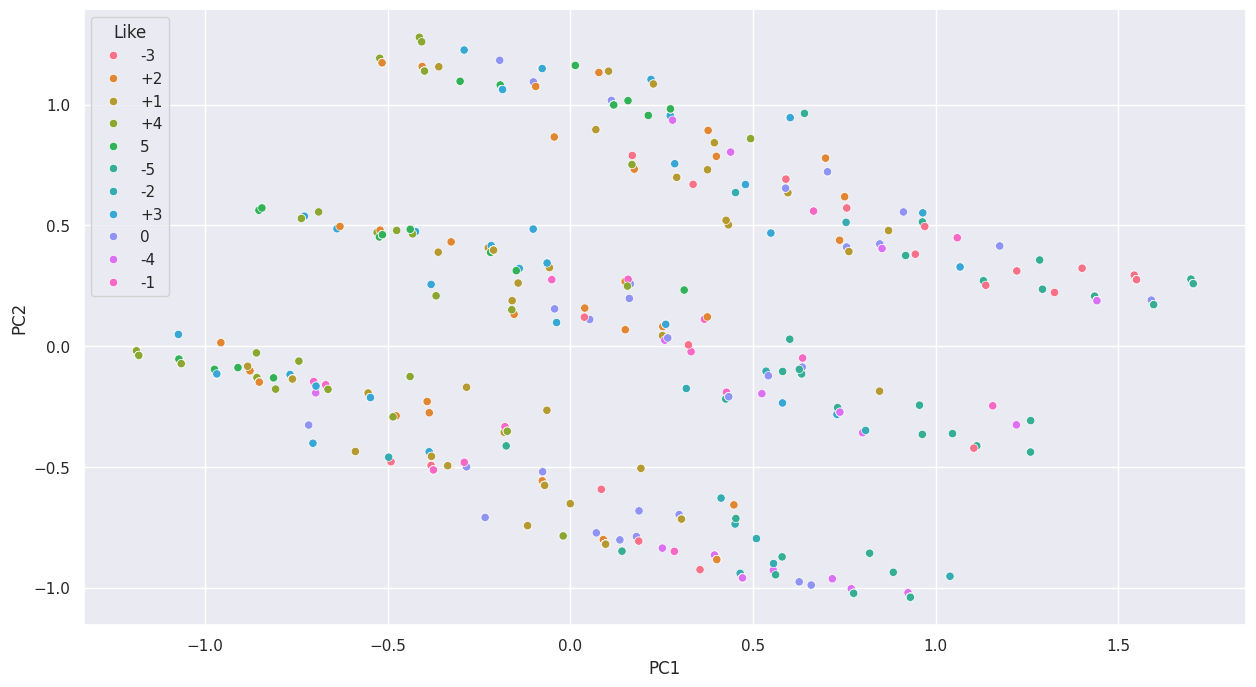

In [17]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=data["Like"])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [21]:
dict1 = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0}
dict2 = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0}
for i in range(len(data)):
    if(data.iloc[i]['Age']<10):
        dict1[10]+=(data.iloc[i]['Like'])
        dict2[10]+=1
    elif(data.iloc[i]['Age']<20):
        dict1[20]+=(data.iloc[i]['Like'])
        dict2[20]+=1
    elif(data.iloc[i]['Age']<30):
        dict1[30]+=(data.iloc[i]['Like'])
        dict2[30]+=1
    elif(data.iloc[i]['Age']<40):
        dict1[40]+=(data.iloc[i]['Like'])
        dict2[40]+=1
    elif(data.iloc[i]['Age']<50):
        dict1[50]+=(data.iloc[i]['Like'])
        dict2[50]+=1
    elif(data.iloc[i]['Age']<60):
        dict1[60]+=(data.iloc[i]['Like'])
        dict2[60]+=1
    elif(data.iloc[i]['Age']<70):
        dict1[70]+=(data.iloc[i]['Like'])
        dict2[70]+=1
    else:
        dict1[80]+=(data.iloc[i]['Like'])
        dict2[80]+=1

for i in dict1.keys():
    if(dict2[i]!=0):
        dict1[i] = dict1[i]/dict2[i]
keys = list(dict1.keys())
vals = list(dict1.values())
sns.barplot(x=keys, y=vals, color='Cyan')

plt.xlabel("Age")
plt.ylabel("Average Likeness Score")


TypeError: unsupported operand type(s) for +=: 'int' and 'str'

# Kmeans Clustering

In [22]:
import warnings
warnings.filterwarnings('ignore')
X=data_bool
ssd = []
from sklearn.cluster import KMeans
for k in range(2,10):
    model = KMeans(n_clusters=k,n_init=10)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

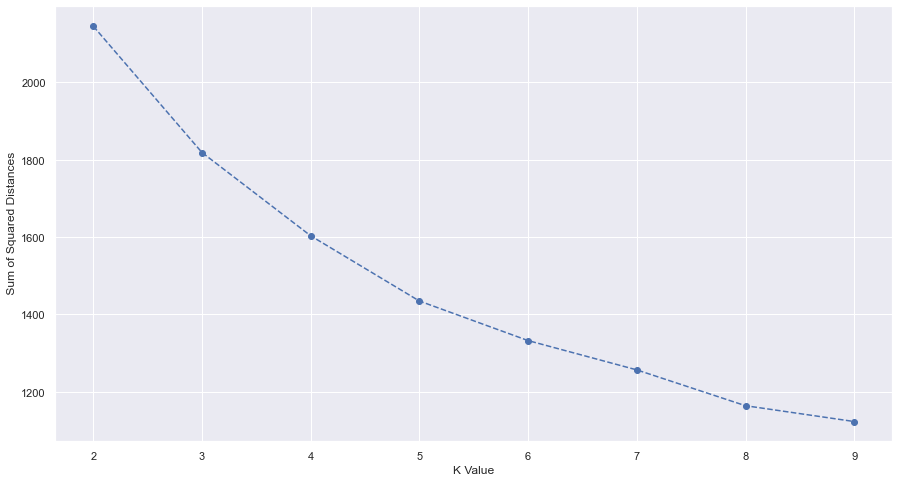

In [ ]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [ ]:
#Here we are not able to find a proper elbow point for our K means clustering data as as result we need to study
#it more using silhoutte score

In [ ]:
from sklearn.metrics import silhouette_score
X=data_bool
silhouette_coefficients = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

Text(0, 0.5, 'Silhouette Score')

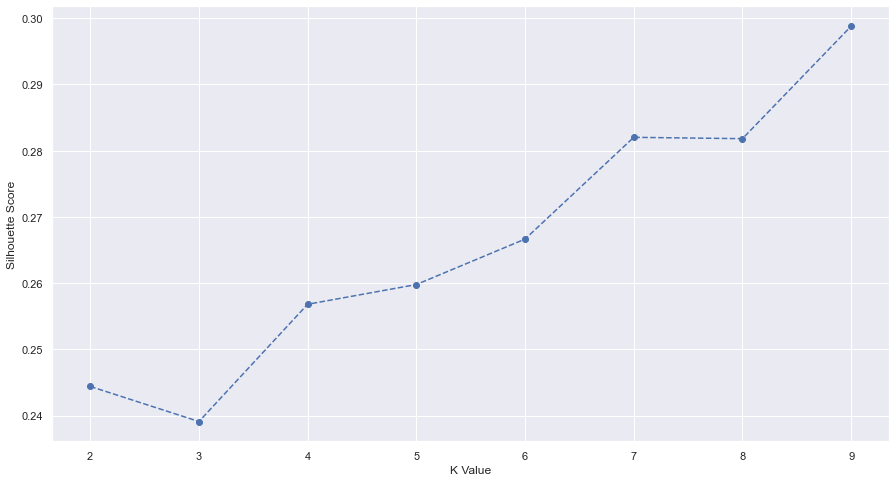

In [ ]:
plt.plot(range(2,10),silhouette_coefficients,'o--')
plt.xlabel("K Value")
plt.ylabel("Silhouette Score")

In [ ]:
#Yet Again there is no visible or apparent elbow positions so we would further study the SSD scores

In [ ]:
from sklearn.datasets import make_moons
features, true_labels = make_moons(n_samples=len(data_bool), noise=0.05)

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
X=data_bool
ari = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = adjusted_rand_score(true_labels, kmeans.labels_)
    ari.append(score)

Text(0, 0.5, 'Adjusted Random Index Score')

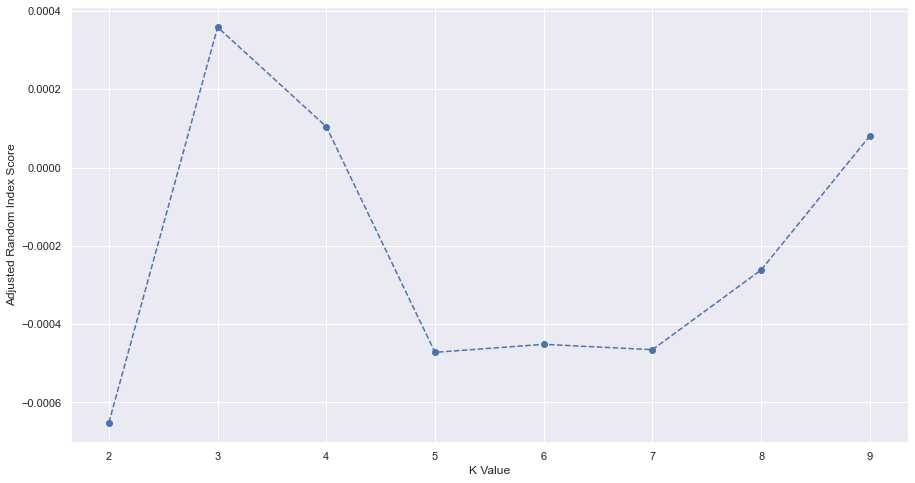

In [ ]:
plt.plot(range(2,10),ari,'o--')
plt.xlabel("K Value")
plt.ylabel("Adjusted Random Index Score")

In [ ]:
#Again Due to no apparent patterns we go back to SSD score

<AxesSubplot:xlabel='K value', ylabel='SSD diffrence'>

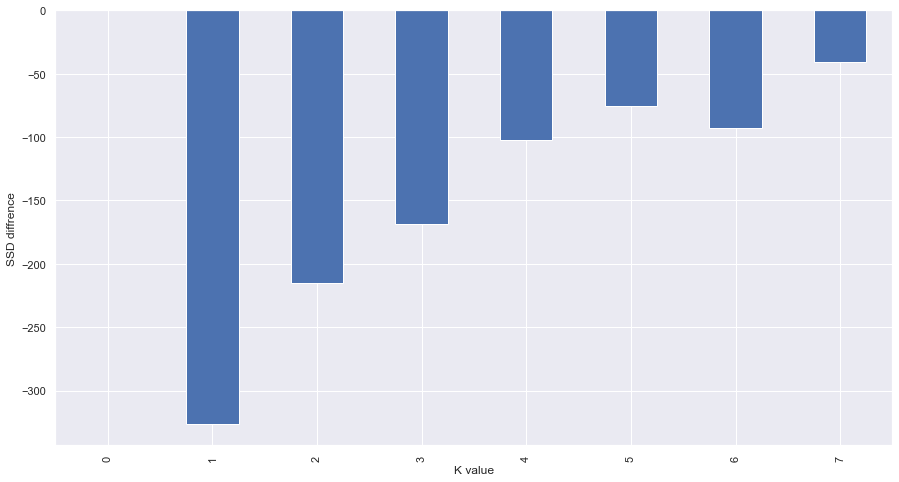

In [ ]:
pd.Series(ssd).diff().plot(kind='bar',ylabel="SSD diffrence",xlabel="K value")

In [ ]:
#Now we see that after 4 segements there is a increase in SSD diffrence hence, 4 is the appropriate number of segments

In [ ]:
final_kmeans = KMeans(n_clusters=4)

In [ ]:
final_kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
final_kmeans.labels_

array([0, 2, 2, ..., 2, 1, 3])

In [ ]:
X["Cluster"]=final_kmeans.labels_

In [ ]:
X

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2
2,0,1,1,1,1,1,0,1,1,1,0,2
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,3
1449,1,1,0,1,0,0,1,1,0,1,0,1
1450,1,1,0,1,0,1,0,1,1,0,0,2
1451,1,1,0,0,0,1,1,1,0,1,0,1


# Segment Profiling

In [ ]:
segement_profile = X.groupby("Cluster").aggregate('mean')

In [ ]:
len(segement_profile.columns)

11

<Figure size 2160x2160 with 0 Axes>

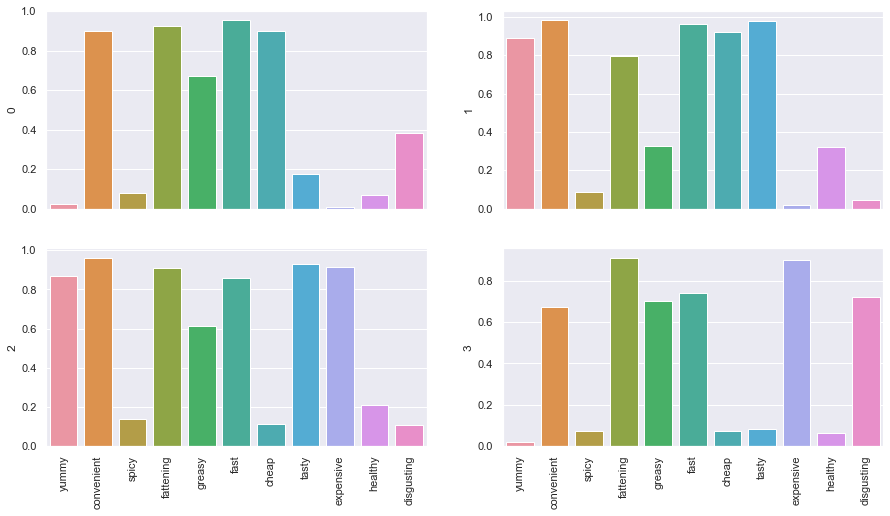

<Figure size 2160x2160 with 0 Axes>

In [ ]:
fig,axes = plt.subplots(2,2,sharex=True)
fig1 = sns.barplot(x=segement_profile.iloc[0].index, y=segement_profile.iloc[0],ax=axes[0,0])
fig1.set_xticklabels(segement_profile.columns, rotation='vertical')
fig2 = sns.barplot(x=segement_profile.iloc[1].index, y=segement_profile.iloc[1],ax=axes[0,1])
fig2.set_xticklabels(segement_profile.columns, rotation='vertical')
fig3 = sns.barplot(x=segement_profile.iloc[2].index, y=segement_profile.iloc[2],ax=axes[1,0])
fig3.set_xticklabels(segement_profile.columns, rotation='vertical')
fig4 = sns.barplot(x=segement_profile.iloc[3].index, y=segement_profile.iloc[3],ax=axes[1,1])
fig4.set_xticklabels(segement_profile.columns, rotation='vertical')
plt.figure(figsize=(30,30))

Text(0, 0.5, 'PC2')

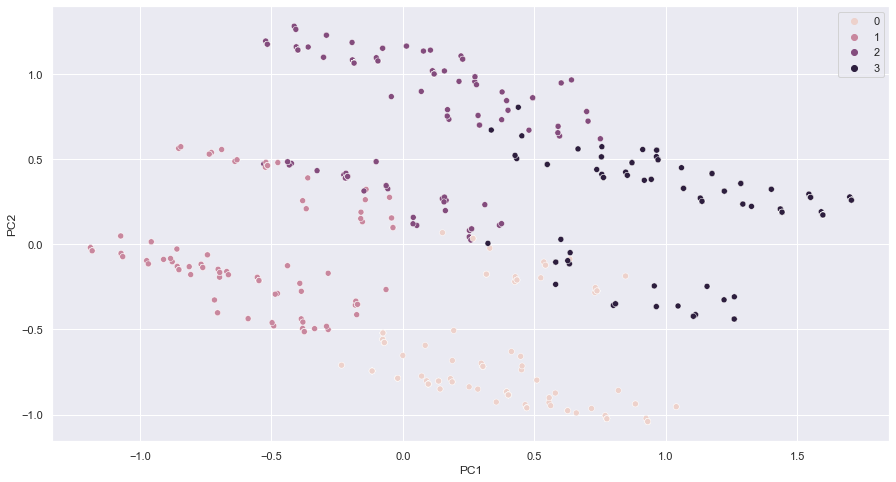

In [ ]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=final_kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
X['Like']=data['Like']
X['Gender']=data['Gender']
X['Age']=data['Age']
X['VisitFrequency']=data['VisitFrequency']

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

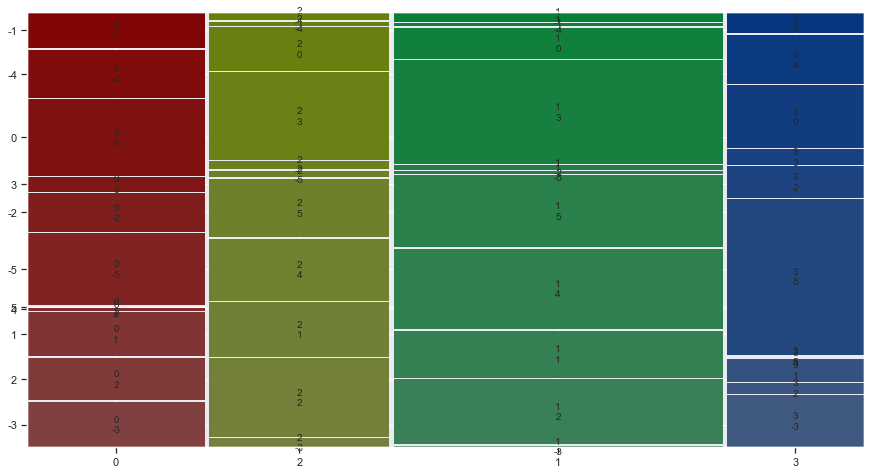

In [ ]:
fig =mosaic(X,['Cluster','Like'])

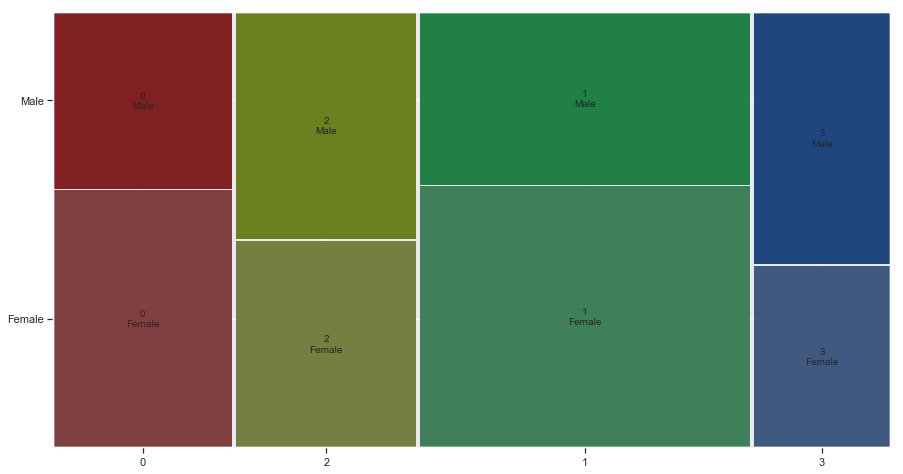

In [ ]:
fig =mosaic(X,['Cluster','Gender'])

<AxesSubplot:xlabel='Cluster', ylabel='Age'>

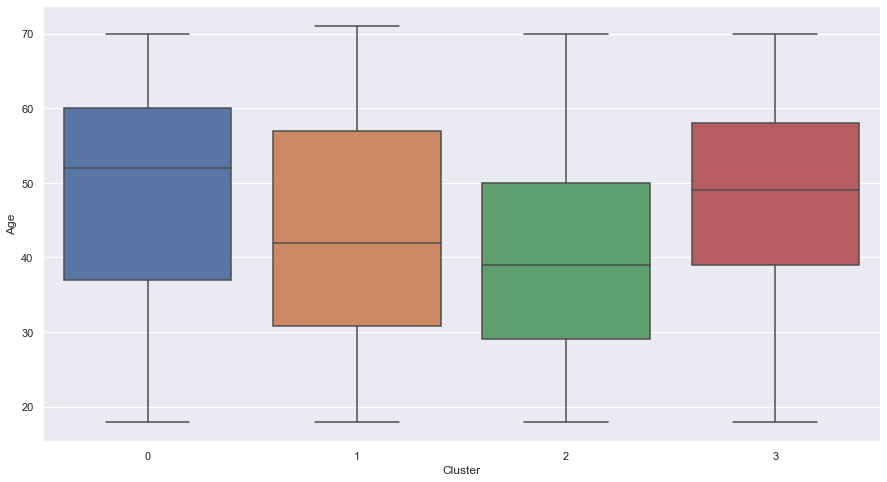

In [ ]:
sns.boxplot(x=X['Cluster'],y=X['Age'])

In [ ]:
X.iloc[:,11:]

,Cluster,Like,Gender,Age,VisitFrequency
0,0,-3,Female,61,4
1,2,2,Female,51,4
2,2,1,Female,62,4
3,1,4,Female,69,52
4,0,2,Male,49,12
...,...,...,...,...,...
1448,3,-5,Male,47,1
1449,1,2,Female,36,52
1450,2,3,Female,52,12
1451,1,4,Male,41,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_new=X.iloc[:,11:].replace(to_replace=(0,1,2),value=0)
X_train=X_new.drop('Cluster',axis=1)
X_train=pd.get_dummies(X_train,drop_first=True)
y_train=X_new['Cluster']

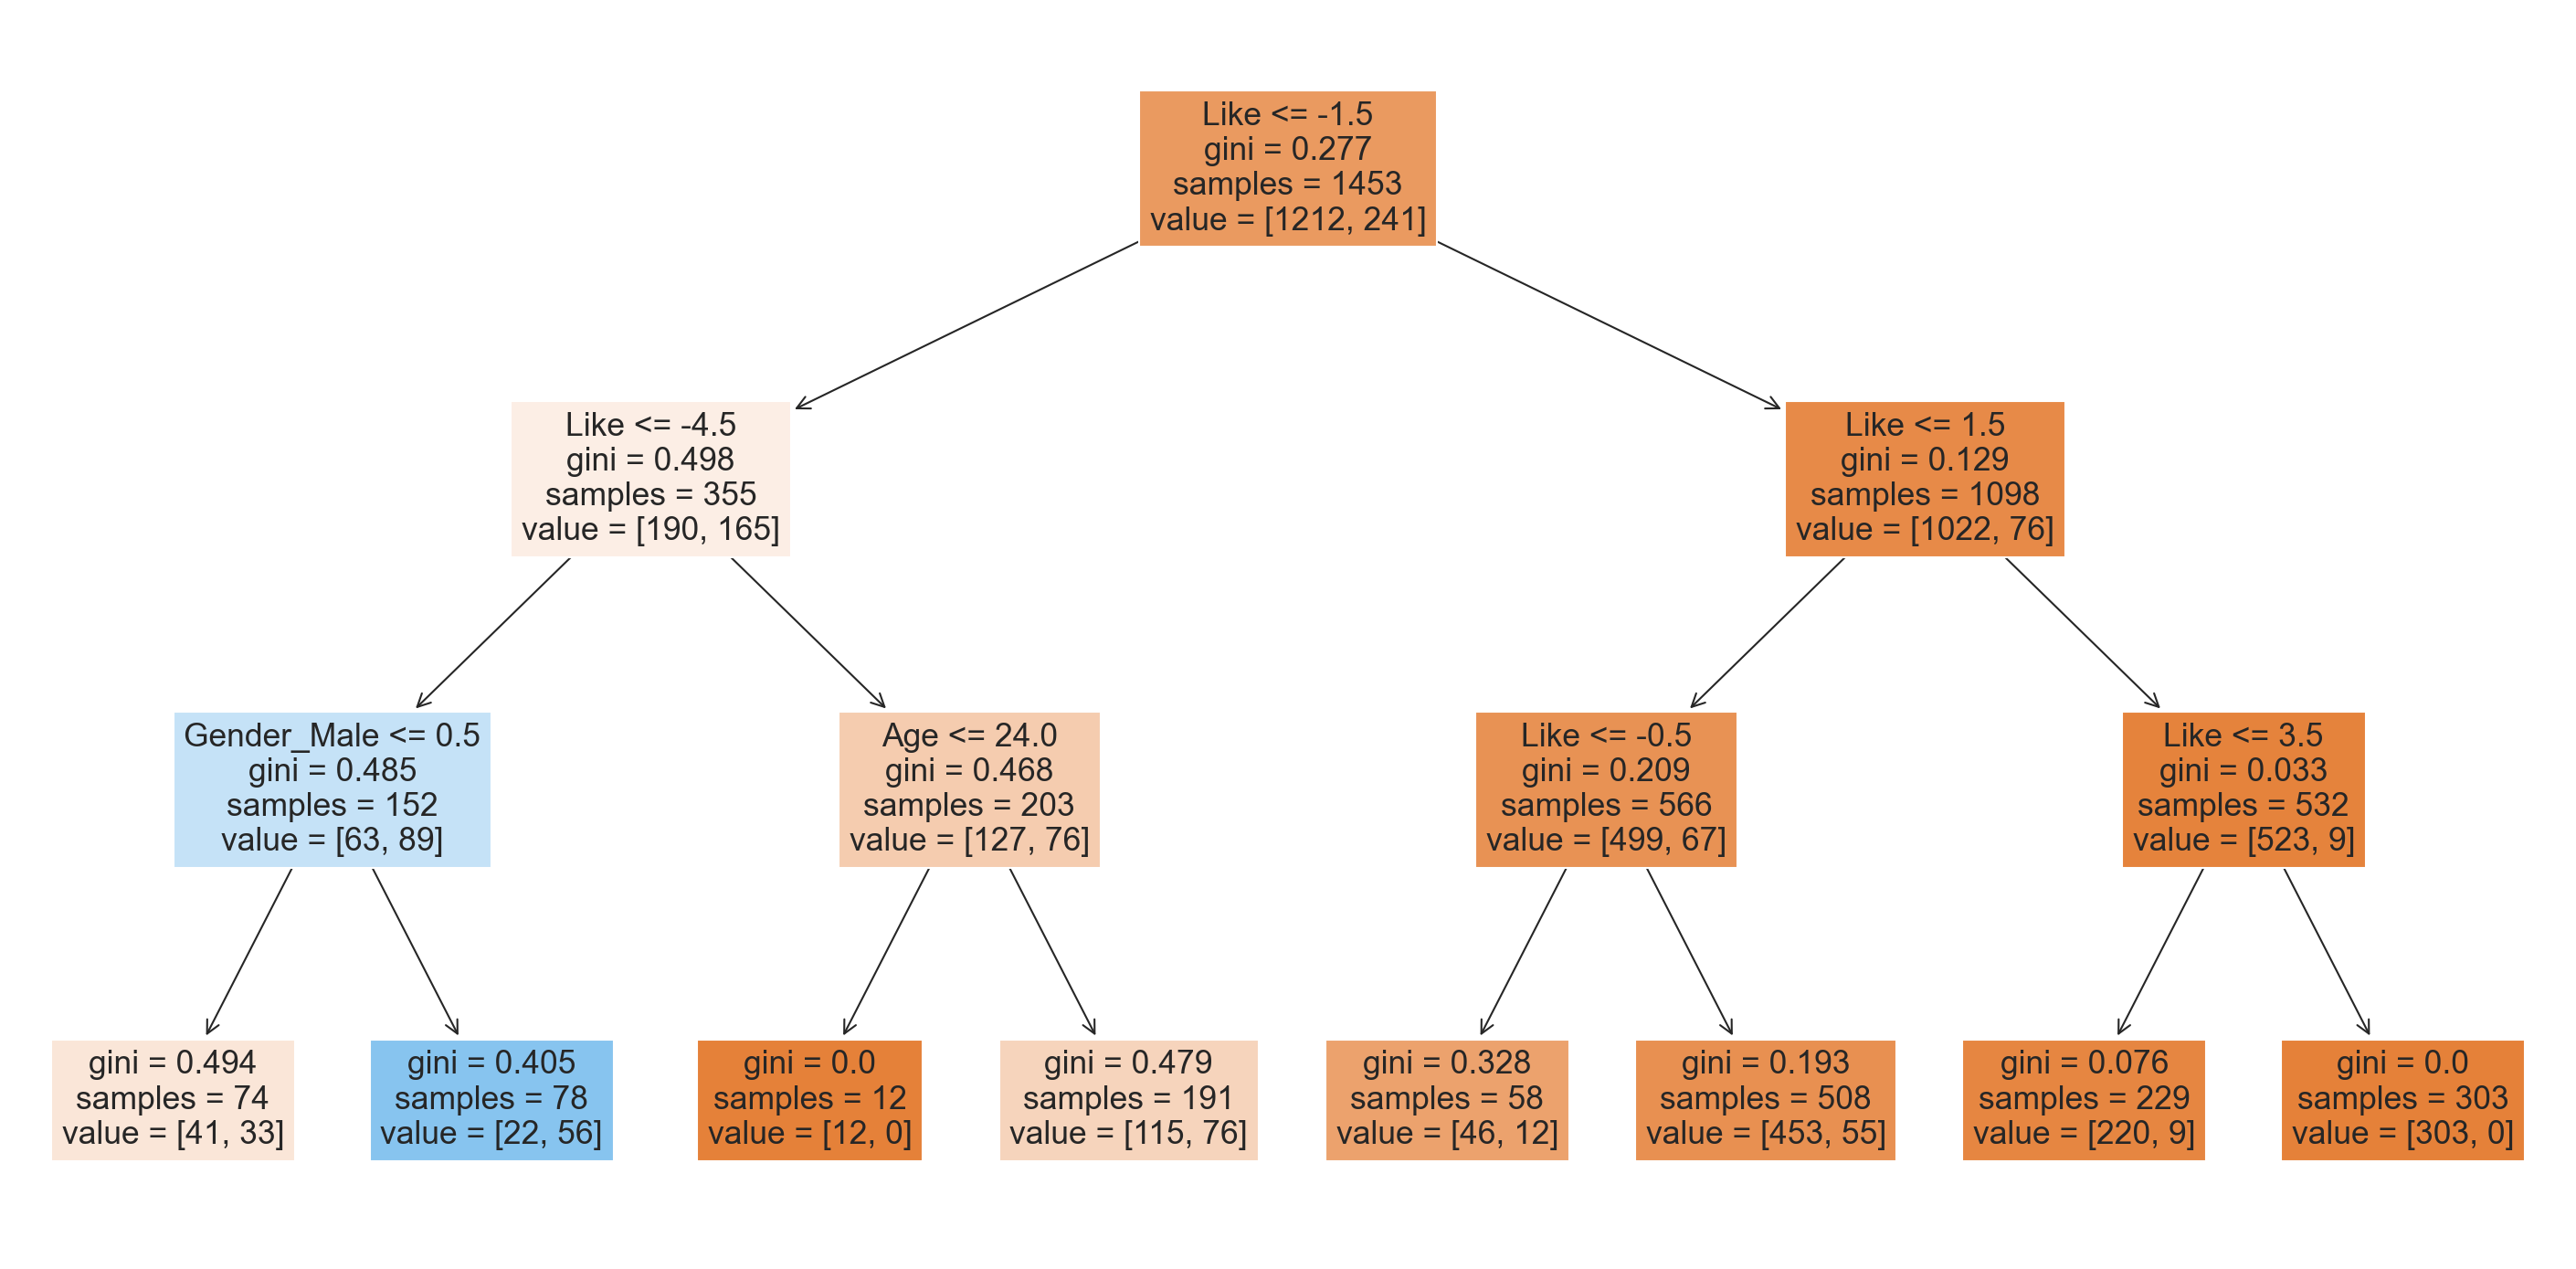

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=150)
plot_tree(model,filled=True,feature_names=X_train.columns);

In [ ]:
segement_profile = X.groupby("Cluster").aggregate('mean')

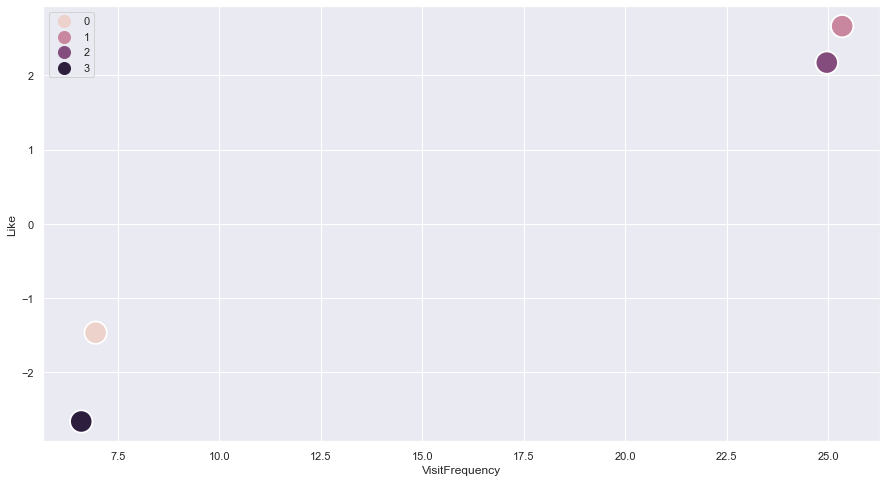

In [ ]:
sns.scatterplot(y=segement_profile['Like'],x=segement_profile['VisitFrequency'],hue=segement_profile.index,s=500)
plt.legend(markerscale=2)

In [ ]:
segement_profile

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency
Cluster,,,,,,,,,,,,,,
0,0.020576,0.666667,0.074074,0.913580,0.703704,0.744856,0.069959,0.090535,0.901235,0.061728,0.716049,-2.650206,47.699588,7.588477
1,0.887931,0.981034,0.086207,0.794828,0.329310,0.960345,0.922414,0.975862,0.017241,0.320690,0.043103,2.665517,43.470690,30.863793
2,0.022222,0.898413,0.079365,0.923810,0.669841,0.952381,0.898413,0.174603,0.009524,0.069841,0.380952,-1.469841,49.069841,6.955556
3,0.876190,0.968254,0.136508,0.907937,0.609524,0.857143,0.111111,0.930159,0.914286,0.209524,0.107937,2.190476,39.841270,31.307937
